# 產生測試資料 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame([['1111','台北',28,'男','1989/01/01',178,80,'!@^%$','2018/05/06','1']
                    ,['2222','高雄',40,'女','1969/01/01',165,52,'!@^%$',np.nan,'0']
                    ,['3333','新竹',np.nan,'女',np.nan,168,40,'!@^%$',np.nan,'0']
                    ,['4444','高雄',40,'男','1969/01/01',190,85,'!@^%$',np.nan,'0']
                    ,['5555','台東',65,'男','1944/01/01',183,73,'!@^%$','2018/01/05','1']])
data.columns = ['subsctn_id','branch','age','gender','birthday','height','weight','Unnamed01','churnDate','target']

In [3]:
data[:]

,subsctn_id,branch,age,gender,birthday,height,weight,Unnamed01,churnDate,target
0,1111,台北,28.0,男,1989/01/01,178,80,!@^%$,2018/05/06,1
1,2222,高雄,40.0,女,1969/01/01,165,52,!@^%$,NaN,0
2,3333,新竹,NaN,女,NaN,168,40,!@^%$,NaN,0
3,4444,高雄,40.0,男,1969/01/01,190,85,!@^%$,NaN,0
4,5555,台東,65.0,男,1944/01/01,183,73,!@^%$,2018/01/05,1


# 產生測試資料(網路開放資料) 

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'class'] #设置变量名
data2 = pd.read_csv(url, names=names)  #采用pandas读取csv数据

In [4]:
data2 = pd.read_csv("D:/Python/data/iris.txt")

In [5]:
data2[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 補值

In [ ]:
import pandas as pd

#補中位數
def fillMedian(rawData,medianValue):
    for i in medianValue:
        med = rawData[i].median()
        rawData[i] = rawData[i].fillna(med)
    return rawData

#補平均值
def fillMean(rawData,medianValue):
    for i in medianValue:
        mean = rawData[i].mean()
        rawData[i] = rawData[i].fillna(mean)
    return rawData

#補non
def fillNon(rawData,nonValue):
    for i in nonValue:
        rawData[i] = rawData[i].fillna('none')
    return rawData

#補N
def fillN(rawData,NValue):
    for i in NValue:
        rawData[i] = rawData[i].fillna('N')
    return rawData

#One-Hot-Code
def oneHot(rawData,dummyValue):
    dummyData = pd.get_dummies(data = rawData, columns=dummyValue)
    return dummyData

###### 補值示範

In [ ]:
data = fillMean(data,['age'])

In [ ]:
data[:]

# 將資料拆解為訓練與測試 

In [ ]:
import numpy as np

def separateTrainTest(rawData):
    #此處比例為80%
    msk = np.random.rand(len(Data)) < 0.8     
    trainData = Data[msk]
    testData = Data[~msk]
    return trainData, testData

# 屬性(X) / 結果(Y) 拆分，並排除敘述性屬性及無名稱欄位

In [ ]:
from sklearn import preprocessing

def dataProcess(rawDatam,describeValue,targetValue):
    #取出資料集中所有欄位名稱
    columnTag = rawData.columns
    #取出資料集中「未知」欄未名稱
    nonColumnTag = [col for col in columnTag if 'Unnamed' in col]
    #取出要排除的欄位名稱，含「未知」
    outerColumn = nonColumnTag + describeValue + targetValue
    
    #屬性(X)
    feature = rawData.drop(outerColumn,axis=1)
    feature = feature.values
    #結果(Y)
    label = rawData[targetValue]
    label = label.values
    
    #標準化 (自己決定要不要用)
    #minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    #feature = minmax_scale.fit_transform(feature)
    
    return feature, label

In [ ]:
describeValue = ['SUBSCTN_ID','statis_ym','target']
targetValue = ['target']

# 用matplotlib畫圖 

In [8]:
import matplotlib.pyplot as plt

###### 畫Lift Chart (自我創作版...有發現問題再麻煩通之一下)

In [ ]:
def showLiftChart(testingPre_prob,testing_label):
    score = testingPre_prob.reshape(len(testingPre_prob))
    indexInverse = np.argsort(score)
    index = indexInverse[::-1]
    sort_testing_label = testing_label[index]
    cTestingLabel = np.cumsum(sort_testing_label)

    stepForward = np.arange(start=1,stop=len(testing_label)+1,step=1)
    stepForwardPercent = stepForward / len(testing_label)

    liftRate = cTestingLabel / stepForward
    
    plt.title('Lift Chart')
    plt.xlabel('Percentage(%)')
    plt.ylabel('Lift Rate(%)')

    plt.xlim(0,100)
    plt.ylim(0,max(liftRate*100) * 1.5)

    plt.scatter(stepForwardPercent * 100,liftRate * 100,marker='.',color='blue')
    plt.show()

###### 分佈圖

In [ ]:
data.hist()
plt.show()

###### 相關係數矩陣熱力圖

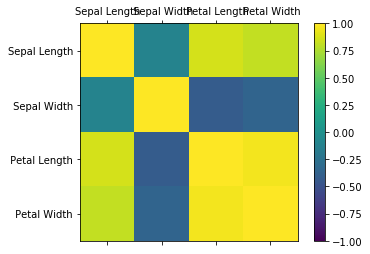

In [15]:
import numpy
correlations = data2.corr()  #計算變數之相關舉陣
# plot correlation matrix
fig = plt.figure() 
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)  #產生熱力圖，值域-1~1
fig.colorbar(cax)  #設定顏色變化為漸進
ticks = numpy.arange(0,4,1) #看有多少維度，step為1
ax.set_xticks(ticks)  #產生刻度
ax.set_yticks(ticks)
ax.set_xticklabels(data2.columns) #生成x轴標籤
ax.set_yticklabels(data2.columns)
plt.show()

###### 散布圖

C:\Users\WEBB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


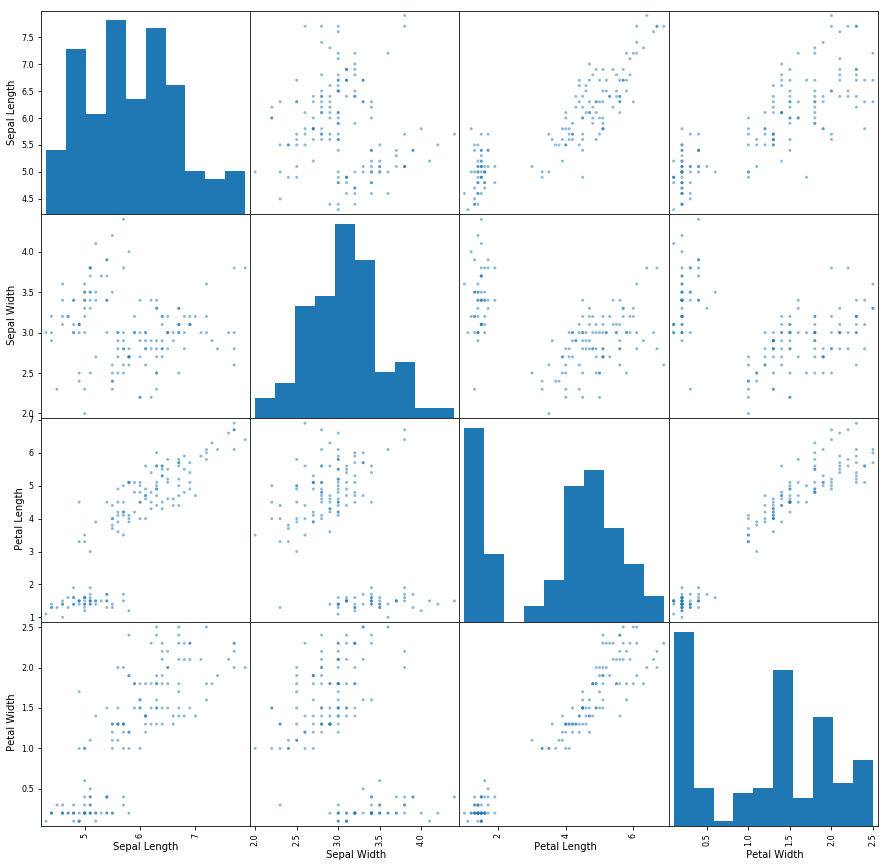

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data2,figsize=(15,15))  
plt.show()